In [ ]:
# import nltk; nltk.download('punkt')
# pip install pycocotools
# !python -m pip  install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu118

In [ ]:
from dataset import make_dataset, default_image_transform
import os.path as osp

main_path = "/localscratch/kamalida/projects/LEFT/data/clevr/train"
dataset = make_dataset(
    scenes_json=osp.join(main_path, 'scenes.json'),
    questions_json=osp.join(main_path, 'questions.json'),
    image_root=osp.join(main_path, 'images'),
    image_transform=default_image_transform,
    vocab_json=osp.join(main_path, 'vocab.json'),
    output_vocab_json=osp.join(main_path, 'output-vocab.json'),
    incl_scene=True,
    incl_raw_scene=True,
)

Vocab loading: Index 1 for word '0' collides with existing word '<unk>'. Assigning new index for '0'.
Vocab loading: Index 0 for word '<PAD>' collides with existing word '<pad>'. Assigning new index for '<PAD>'.
Vocab loading: Index 1 for word '0' collides with existing word '<unk>'. Assigning new index for '0'.
Vocab loading: Index 0 for word '<PAD>' collides with existing word '<pad>'. Assigning new index for '<PAD>'.


In [ ]:
## filter filter_program_size_raw
print(len(dataset)) # 699989
dataset.filter_relational_type()
print("Only conceptual questions are kept")
print(len(dataset)) # 71281

(256, 384, 3)


{'all_objects': [{'3d_coords': [-1.3705521821975708,
                                2.0794010162353516,
                                0.699999988079071],
                  'color': 'blue',
                  'material': 'rubber',
                  'pixel_coords': [269, 88, 12.661545753479004],
                  'rotation': 269.8517172617167,
                  'shape': 'cube',
                  'size': 'large'},
                 {'3d_coords': [-2.9289753437042236,
                                -1.7488206624984741,
                                0.699999988079071],
                  'color': 'green',
                  'material': 'metal',
                  'pixel_coords': [93, 108, 11.522202491760254],
                  'rotation': 292.2219458666971,
                  'shape': 'cylinder',
                  'size': 'large'},
                 {'3d_coords': [1.5515961647033691,
                                0.6776641607284546,
                                0.3499999940395355],
    

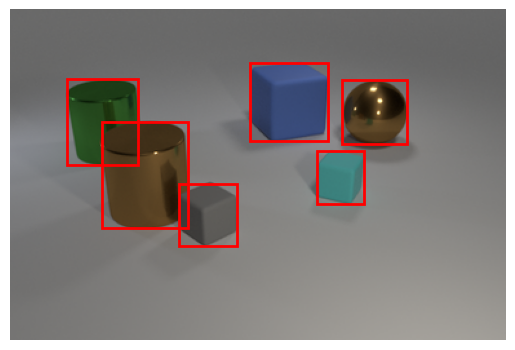

In [5]:
from pprint import pprint
pprint(dataset[0]["image"].shape)
pprint(dataset[0])

## let's plot the image
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(dataset[0]["image"])
## for bounding box in dataset[0]["objects_raw"] draw a rectangle
for bbox in dataset[0]["objects"]:
    x_min, y_min, x_max, y_max = bbox
    plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2))
# plt.imshow(np.transpose(dataset[0]["image"], (1, 2, 0)))
plt.axis('off')
plt.show()

In [ ]:

from modules import ResNetPatcher
model = ResNetPatcher(resnet_model_name='dummy', pretrained=True, device='cuda')


In [8]:
## num parameters
print(sum(p.numel() for p in model.parameters() if p.requires_grad))

308283392


In [9]:
model(dataset[0]["pil_image"], dataset[0]["objects_raw"])["object_features"][0].shape

torch.Size([2048])

In [1]:
from dataset import g_attribute_concepts
from pprint import pprint

pprint(g_attribute_concepts)

{'color': ['gray', 'red', 'blue', 'green', 'brown', 'purple', 'cyan', 'yellow'],
 'material': ['rubber', 'metal'],
 'shape': ['cube', 'sphere', 'cylinder'],
 'size': ['small', 'large']}
